# EDA Final Analyses

In [1]:
# load modules
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 8),"axes.facecolor" : "white", "axes.edgecolor":  "black", "axes.labelsize": 14, 'xtick.labelsize': 12, 'ytick.labelsize': 12, 'axes.titlesize': 14})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
# load data
df = pd.read_csv('./data/processed_data.csv')
df.head()

date      price    house_id     id year_month  bedrooms  bathrooms  \
0  2014-05-03 379880.000  1523069197  13154    2014-05     3.000      2.500   
1  2014-05-14 766950.000  7574910780   5351    2014-05     3.000      2.500   
2  2014-05-09 201500.000  8857600490   9381    2014-05     3.000      1.000   
3  2014-05-07 280000.000  2895550280  16329    2014-05     3.000      2.500   
4  2014-05-21 189650.000  9315300260   1833    2014-05     2.000      1.750   

   sqft_living  sqft_lot  floors  ...  yr_built  yr_renovated  zipcode    lat  \
0     1650.000 14054.000   1.000  ...      1986         0.000    98027 47.482   
1     3030.000 30007.000   1.500  ...      1992         0.000    98077 47.743   
2     1160.000  8320.000   1.000  ...      1959         0.000    98032 47.383   
3     1600.000  4271.000   2.000  ...      2000         0.000    98001 47.330   
4     1100.000  7600.000   1.000  ...      1980         0.000    98198 47.414   

      long  sqft_living15  sqft_lot15  yr_r_clean  yr_bin  yr_r_time  
0 -122.017       1940.000   87555.000         NaN   False        NaN  
1 -122.036       3360.000   34983.000         NaN   False        NaN  
2 -122.288       1480.000    7800.000         NaN   False        NaN  
3 -122.269       1700.000    4746.000         NaN   False        NaN  
4 -122.318       1230.000    7350.000         NaN   False        NaN  

[5 rows x 26 columns]

In [3]:
df.describe()

price       house_id        id  bedrooms  bathrooms  sqft_living  \
count   21597.000      21597.000 21597.000 21597.000  21597.000    21597.000   
mean   540296.574 4580474287.771 10799.000     3.373      2.116     2080.322   
std    367368.140 2876735715.748  6234.661     0.926      0.769      918.106   
min     78000.000    1000102.000     1.000     1.000      0.500      370.000   
25%    322000.000 2123049175.000  5400.000     3.000      1.750     1430.000   
50%    450000.000 3904930410.000 10799.000     3.000      2.250     1910.000   
75%    645000.000 7308900490.000 16198.000     4.000      2.500     2550.000   
max   7700000.000 9900000190.000 21597.000    33.000      8.000    13540.000   

         sqft_lot    floors  waterfront      view  ...  sqft_basement  \
count   21597.000 21597.000   19206.000 21534.000  ...      21145.000   
mean    15099.409     1.494       0.008     0.234  ...        291.857   
std     41412.637     0.540       0.087     0.766  ...        442.491   
min       520.000     1.000       0.000     0.000  ...          0.000   
25%      5040.000     1.000       0.000     0.000  ...          0.000   
50%      7618.000     1.500       0.000     0.000  ...          0.000   
75%     10685.000     2.000       0.000     0.000  ...        560.000   
max   1651359.000     3.500       1.000     4.000  ...       4820.000   

       yr_built  yr_renovated   zipcode       lat      long  sqft_living15  \
count 21597.000     17749.000 21597.000 21597.000 21597.000      21597.000   
mean   1971.000       836.651 98077.952    47.560  -122.214       1986.620   
std      29.375      4000.111    53.513     0.139     0.141        685.230   
min    1900.000         0.000 98001.000    47.156  -122.519        399.000   
25%    1951.000         0.000 98033.000    47.471  -122.328       1490.000   
50%    1975.000         0.000 98065.000    47.572  -122.231       1840.000   
75%    1997.000         0.000 98118.000    47.678  -122.125       2360.000   
max    2015.000     20150.000 98199.000    47.778  -121.315       6210.000   

       sqft_lot15  yr_r_clean  yr_r_time  
count   21597.000     744.000    744.000  
mean    12758.284    1995.929     56.473  
std     27274.442      15.600     23.653  
min       651.000    1934.000      6.000  
25%      5100.000    1987.000     37.000  
50%      7620.000    2000.000     54.000  
75%     10083.000    2007.250     74.000  
max    871200.000    2015.000    114.000  

[8 rows x 23 columns]

In [4]:
import plotly.graph_objects as go

# Define the latitude and longitude boundaries for Kings County
kings_county_bounds = {
    "lon": [-122.437, -121.101],
    "lat": [47.1559, 47.777]
}

fig = go.Figure(data=go.Scattergeo(
    lon=df['long'],
    lat=df['lat'],
    text=df['zipcode'],
    mode='markers',
    marker=dict(
        size=8,  # Set the marker size
        color=df['price'],  # Color the markers based on the price
        colorscale='Viridis',  # Set the colorscale
        colorbar=dict(title='Price')  # Add a colorbar
    )
))

fig.update_geos(
    projection_type="natural earth",
    fitbounds="locations",  # Adjust the map boundaries to fit the specified locations
    visible=False,  # Hide the bounding box
    lonaxis_range=kings_county_bounds['lon'],  # Set the longitude boundaries
    lataxis_range=kings_county_bounds['lat']   # Set the latitude boundaries
)

fig.update_layout(
    title='Location of all houses in Kings County',
    height=600,  # Adjust the height to better fit your data
    margin={"r": 0, "t": 30, "l": 0, "b": 0}
)

fig.show()


## Plan:
 1. Check grades with highest price differences and look for undervalued objects.
 2. Check chances of saisonality and how trustful it is.
 3. Neighborhoods show big differences in age and prices.
 4. Check prices of renovation vs. unrenovated (think about comparison)
 5. Get best time points for buy/sell and renovation.

### Be aware:
Currently, there are houses included which are sold more than once. For the visual inspection I have decided to leave them in as they are, yet, if I would like to run linear analyses, those values are not independent and would need to be addressed.

In [5]:
# Grades with highest price differences have possibility for undervalued objects
# Saisonal prices may be distorted by extreme values.
# Renovated houses bring more money than unrenovated houses of the same age.
#

In [6]:
# Check grades, identify grades with highest range and check differences between lower and upper houses.
df_graderange = df.groupby('grade')['price'].describe()
df_graderange['price_range'] = ((df_graderange['max'] - df_graderange['min']) / df_graderange['min']) * 100
df_graderange

count        mean         std         min         25%         50%  \
grade                                                                        
3        1.000  262000.000         NaN  262000.000  262000.000  262000.000   
4       27.000  212001.852   97294.498   80000.000  142500.000  200000.000   
5      242.000  248523.971  118100.280   78000.000  175000.000  228700.000   
6     2038.000  301916.571  122952.248   82000.000  215037.500  275276.500   
7     8974.000  402594.573  155728.547   90000.000  285000.000  375000.000   
8     6065.000  542986.800  217627.956  140000.000  390000.000  510000.000   
9     2615.000  773738.222  316522.125  230000.000  571500.000  720000.000   
10    1134.000 1072347.467  484050.810  316000.000  768087.500  914327.000   
11     399.000 1497792.378  705127.364  420000.000 1040000.000 1280000.000   
12      89.000 2202528.090 1028718.069  835000.000 1500000.000 1820000.000   
13      13.000 3710769.231 1859545.023 1780000.000 2420000.000 2980000.000   

              75%         max  price_range  
grade                                       
3      262000.000  262000.000        0.000  
4      273500.000  435000.000      443.750  
5      295750.000  795000.000      919.231  
6      366837.500 1200000.000     1363.415  
7      485000.000 2050000.000     2177.778  
8      640000.000 3070000.000     2092.857  
9      880000.000 2700000.000     1073.913  
10    1250000.000 3600000.000     1039.241  
11    1700000.000 7060000.000     1580.952  
12    2700000.000 5350000.000      540.719  
13    3800000.000 7700000.000      332.584

['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', '#4B6079', '#4B6079', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey']


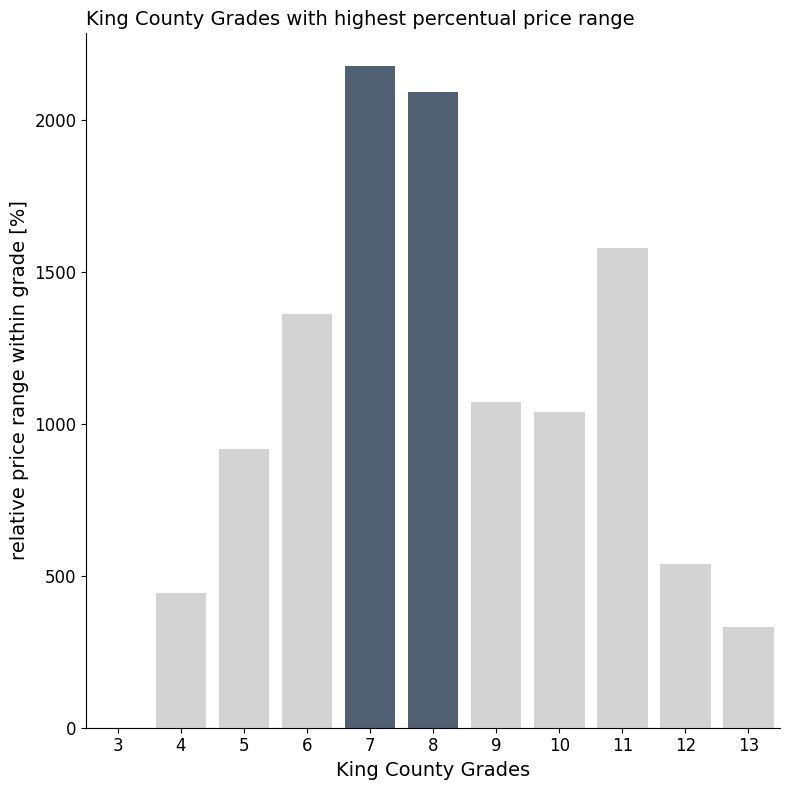

In [7]:
df_graderange['grade_str'] = list(df_graderange.index)
df_graderange['grade_str'] = df_graderange['grade_str'].astype(object)

palette=['#4B6079' if val in [7, 8] else 'lightgrey' for val in sorted(df_graderange['grade_str'].tolist())]

print(palette)
pr_plot = sns.barplot(df_graderange,
                      x = 'grade_str',
                      y = 'price_range',
                     palette = palette)

sns.despine(top=True, right=True, left=False, bottom=False)
plt.title('King County Grades with highest percentual price range', loc = 'left')
plt.xlabel('King County Grades')
plt.ylabel('relative price range within grade [%]')

plt.tight_layout()

fig = pr_plot.get_figure()
fig.savefig("./plots/presentation/01_price_grade_differences.png")


In [8]:
# now, focus on those two grades.
df_78 = df.query('grade == 7 | grade == 8')
df_78.describe()

price       house_id        id  bedrooms  bathrooms  sqft_living  \
count   15039.000      15039.000 15039.000 15039.000  15039.000    15039.000   
mean   459212.623 4627269542.050 10701.379     3.348      2.039     1889.257   
std    195735.609 2869240021.858  6185.689     0.889      0.634      597.846   
min     90000.000    1000102.000     1.000     1.000      0.500      550.000   
25%    320000.000 2201500107.500  5343.500     3.000      1.750     1440.000   
50%    425000.000 3990200125.000 10665.000     3.000      2.000     1820.000   
75%    555000.000 7314800095.000 16000.500     4.000      2.500     2250.000   
max   3070000.000 9842300540.000 21597.000    33.000      7.500     5370.000   

         sqft_lot    floors  waterfront      view  ...  sqft_basement  \
count   15039.000 15039.000   13370.000 15001.000  ...      14724.000   
mean    12473.259     1.446       0.004     0.159  ...        295.862   
std     31961.408     0.541       0.063     0.617  ...        410.703   
min       520.000     1.000       0.000     0.000  ...          0.000   
25%      4840.000     1.000       0.000     0.000  ...          0.000   
50%      7350.000     1.000       0.000     0.000  ...          0.000   
75%      9847.000     2.000       0.000     0.000  ...        580.000   
max   1074218.000     3.500       1.000     4.000  ...       2170.000   

       yr_built  yr_renovated   zipcode       lat      long  sqft_living15  \
count 15039.000     12349.000 15039.000 15039.000 15039.000      15039.000   
mean   1970.382       801.562 98078.796    47.558  -122.223       1835.672   
std      28.036      3918.694    53.638     0.144     0.137        464.593   
min    1900.000         0.000 98001.000    47.156  -122.519        399.000   
25%    1954.000         0.000 98033.000    47.450  -122.333       1490.000   
50%    1972.000         0.000 98065.000    47.574  -122.257       1770.000   
75%    1993.000         0.000 98118.000    47.683  -122.142       2120.000   
max    2015.000     20150.000 98199.000    47.778  -121.319       4480.000   

       sqft_lot15  yr_r_clean  yr_r_time  
count   15039.000     496.000    496.000  
mean    10920.581    1995.663     57.692  
std     22074.435      15.290     23.856  
min       659.000    1940.000      9.000  
25%      4944.500    1986.000     38.000  
50%      7438.000    1998.000     56.000  
75%      9586.000    2008.000     75.000  
max    438213.000    2015.000    114.000  

[8 rows x 23 columns]

In [9]:
# check ideally directly, how many neighborhoods:
df_78.zipcode.value_counts() # ok, that is widespread...

zipcode
98103    523
98115    495
98038    463
98034    459
98117    431
        ... 
98102     63
98010     52
98148     50
98024     40
98039     14
Name: count, Length: 70, dtype: int64

In [10]:
# Divide dataset into upper and lower 'quantiles' and see their differences/main characteristica.
# Then look for houses with upper class characteristica in the lower price range.
df_78.describe()

price       house_id        id  bedrooms  bathrooms  sqft_living  \
count   15039.000      15039.000 15039.000 15039.000  15039.000    15039.000   
mean   459212.623 4627269542.050 10701.379     3.348      2.039     1889.257   
std    195735.609 2869240021.858  6185.689     0.889      0.634      597.846   
min     90000.000    1000102.000     1.000     1.000      0.500      550.000   
25%    320000.000 2201500107.500  5343.500     3.000      1.750     1440.000   
50%    425000.000 3990200125.000 10665.000     3.000      2.000     1820.000   
75%    555000.000 7314800095.000 16000.500     4.000      2.500     2250.000   
max   3070000.000 9842300540.000 21597.000    33.000      7.500     5370.000   

         sqft_lot    floors  waterfront      view  ...  sqft_basement  \
count   15039.000 15039.000   13370.000 15001.000  ...      14724.000   
mean    12473.259     1.446       0.004     0.159  ...        295.862   
std     31961.408     0.541       0.063     0.617  ...        410.703   
min       520.000     1.000       0.000     0.000  ...          0.000   
25%      4840.000     1.000       0.000     0.000  ...          0.000   
50%      7350.000     1.000       0.000     0.000  ...          0.000   
75%      9847.000     2.000       0.000     0.000  ...        580.000   
max   1074218.000     3.500       1.000     4.000  ...       2170.000   

       yr_built  yr_renovated   zipcode       lat      long  sqft_living15  \
count 15039.000     12349.000 15039.000 15039.000 15039.000      15039.000   
mean   1970.382       801.562 98078.796    47.558  -122.223       1835.672   
std      28.036      3918.694    53.638     0.144     0.137        464.593   
min    1900.000         0.000 98001.000    47.156  -122.519        399.000   
25%    1954.000         0.000 98033.000    47.450  -122.333       1490.000   
50%    1972.000         0.000 98065.000    47.574  -122.257       1770.000   
75%    1993.000         0.000 98118.000    47.683  -122.142       2120.000   
max    2015.000     20150.000 98199.000    47.778  -121.319       4480.000   

       sqft_lot15  yr_r_clean  yr_r_time  
count   15039.000     496.000    496.000  
mean    10920.581    1995.663     57.692  
std     22074.435      15.290     23.856  
min       659.000    1940.000      9.000  
25%      4944.500    1986.000     38.000  
50%      7438.000    1998.000     56.000  
75%      9586.000    2008.000     75.000  
max    438213.000    2015.000    114.000  

[8 rows x 23 columns]

In [11]:
df_78.columns

Index(['date', 'price', 'house_id', 'id', 'year_month', 'bedrooms',
       'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'yr_r_clean', 'yr_bin', 'yr_r_time'],
      dtype='object')

In [12]:
# create price class
df_78['price_class'] = ['upper' if pr > 425000 else 'lower' for pr in df_78.price]

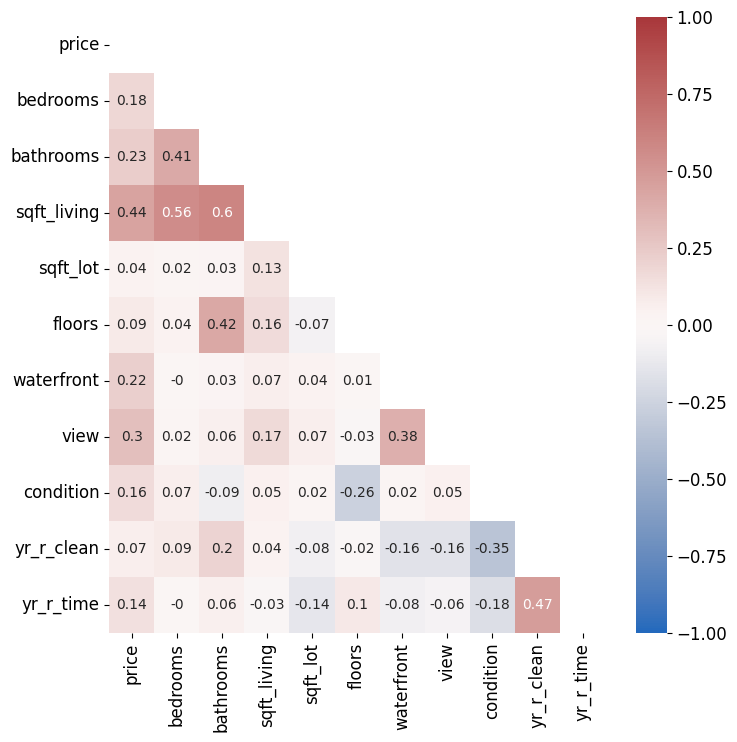

In [13]:
# Create corr matrix to see which values are strongly together:
df_78[['price',
      'bedrooms',
      'bathrooms',
      'sqft_living',
      'sqft_lot',
      'floors',
      'waterfront',
      'view',
      'condition',
      'yr_r_clean',
      'yr_r_time']].corr()

matrix = df_78[['price',
      'bedrooms',
      'bathrooms',
      'sqft_living',
      'sqft_lot',
      'floors',
      'waterfront',
      'view',
      'condition',
      'yr_r_clean',
      'yr_r_time']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

Insights:
 * It doesn't seem like any of those parameters correlates really strong with the parameter.
 * sqft_living is a decent enough proxy for bedrooms and bathrooms
 * sqft_living is also correlated the strongest with the price.

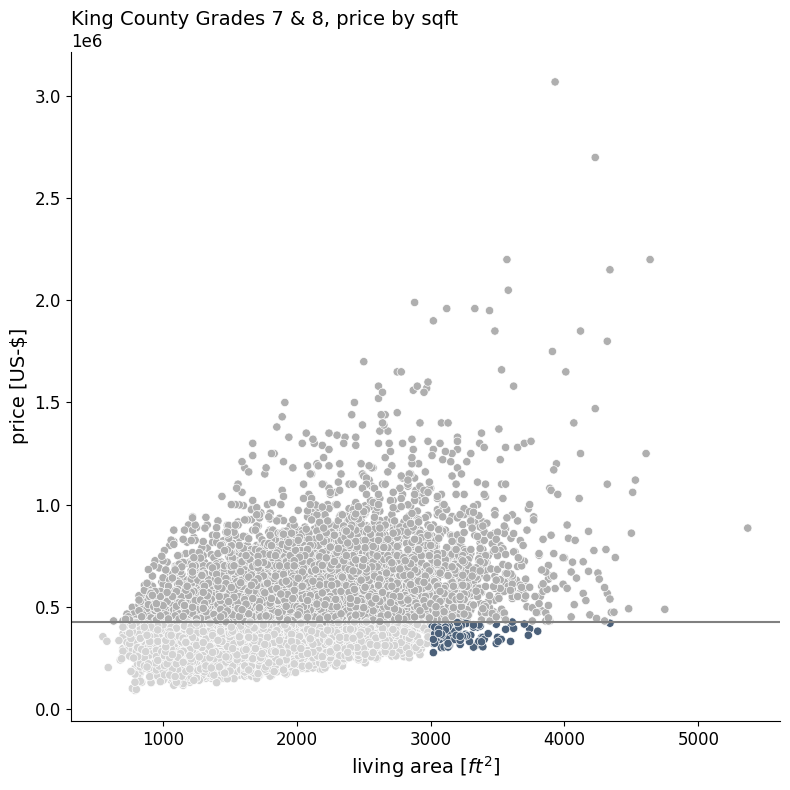

In [14]:
# Define your color palette
palette = {'lower_gt_3000': '#4B6079', 'lower_lt_3000': 'lightgrey', 'upper': '#afafaf'}

# Add a new column to categorize points based on your conditions
df_78['color_category'] = df_78.apply(lambda row: 'lower_gt_3000' if row['price_class'] == 'lower' and row['sqft_living'] > 3000 else 'lower_lt_3000' if row['price_class'] == 'lower' else 'upper', axis=1)

# Set the hue_order based on the categories you created
hue_order = ['lower_gt_3000', 'lower_lt_3000', 'upper']

# Create the scatterplot
medi_priceclass = sns.scatterplot(data=df_78,
                                  x='sqft_living',
                                  y='price',
                                  hue='color_category',
                                  palette=palette,
                                  hue_order=hue_order,
                                 legend = False)

# Optionally, you can adjust legend labels
# medi_priceclass.legend()

sns.despine(top=True, right=True, left=False, bottom=False)
medi_priceclass.axhline(df_78.price.median(), color = 'grey')
plt.title('King County Grades 7 & 8, price by sqft', loc = 'left')
plt.xlabel('living area [$ft^2$]')
plt.ylabel('price [US-$]')

plt.tight_layout()  

fig = medi_priceclass.get_figure()
fig.savefig("./plots/presentation/02_priceclass_sqft.png")

In [15]:
df_return = df_78.copy()
df_return = df_return.query('sqft_living > 3000')

In [16]:
df_return.groupby('price_class').describe()['yr_r_clean']

count     mean    std      min      25%      50%      75%  \
price_class                                                              
lower        3.000 1980.000 15.875 1962.000 1974.000 1986.000 1989.000   
upper       48.000 1994.958 13.944 1956.000 1985.500 1997.000 2005.500   

                 max  
price_class           
lower       1992.000  
upper       2015.000

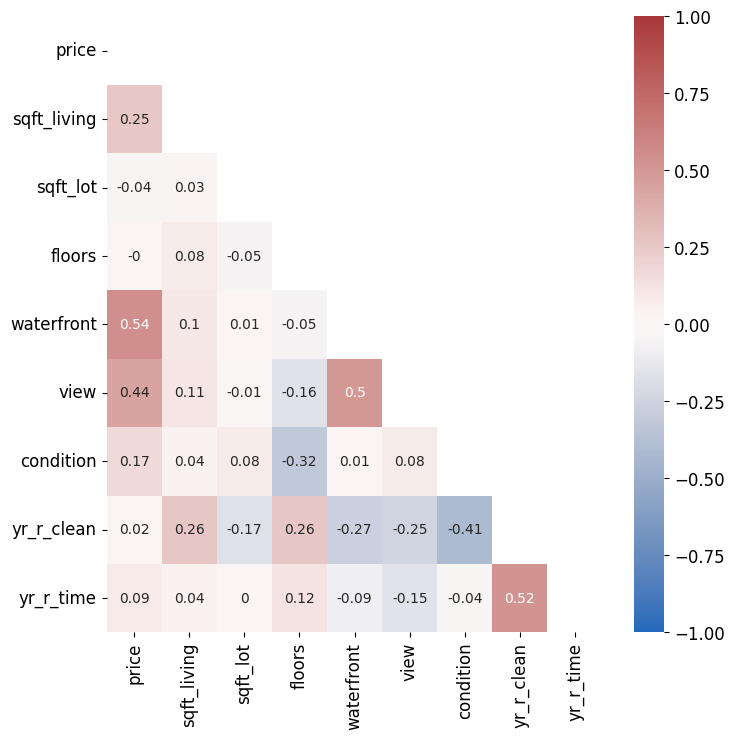

In [17]:
# Questions to ask:
# How do the houses differ?
# - Age?
# - View?
# - Waterfront?
# - Renovation?
# - zipcode?
# - Lot area?

matrix = df_return[['price',
      'sqft_living',
      'sqft_lot',
      'floors',
      'waterfront',
      'view',
      'condition',
      'yr_r_clean',
      'yr_r_time']].corr().round(2)
mask = np.triu(np.ones_like(matrix, dtype=bool))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', mask=mask)
plt.show()

# Ok, then it seems that waterfront and view play a more important role for the price.
# See if there are objects with waterfront and still lower price class

In [18]:
df_return.query('price_class == "lower" & waterfront == 1')
# ok, there are no objects within the lower price class and a waterfront.

Empty DataFrame
Columns: [date, price, house_id, id, year_month, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, yr_r_clean, yr_bin, yr_r_time, price_class, color_category]
Index: []

[0 rows x 28 columns]

In [19]:
df_return.query('price_class == "lower" & view > 2')
# house-id 7893800335 may be a candidate.

date      price    house_id    id year_month  bedrooms  \
18431  2015-03-13 425000.000   121039042  8444    2015-03     3.000   
19135  2015-04-30 328000.000  7893800335  1177    2015-04     4.000   

       bathrooms  sqft_living   sqft_lot  floors  ...  zipcode    lat  \
18431      2.750     3610.000 107386.000   1.500  ...    98023 47.335   
19135      3.250     3380.000   7500.000   2.000  ...    98198 47.409   

          long  sqft_living15  sqft_lot15  yr_r_clean  yr_bin  yr_r_time  \
18431 -122.362       2630.000   42126.000    1962.000    True     44.000   
19135 -122.330       1920.000    7500.000         NaN   False        NaN   

       price_class  color_category  
18431        lower   lower_gt_3000  
19135        lower   lower_gt_3000  

[2 rows x 28 columns]

In [20]:
# check the house:
for col in df_return.columns:
    print(df_return[df_return.house_id == 7893800335][col])

19135    2015-04-30
Name: date, dtype: object
19135   328000.000
Name: price, dtype: float64
19135    7893800335
Name: house_id, dtype: int64
19135    1177
Name: id, dtype: int64
19135    2015-04
Name: year_month, dtype: object
19135   4.000
Name: bedrooms, dtype: float64
19135   3.250
Name: bathrooms, dtype: float64
19135   3380.000
Name: sqft_living, dtype: float64
19135   7500.000
Name: sqft_lot, dtype: float64
19135   2.000
Name: floors, dtype: float64
19135   NaN
Name: waterfront, dtype: float64
19135   3.000
Name: view, dtype: float64
19135    3
Name: condition, dtype: int64
19135    7
Name: grade, dtype: int64
19135   2420.000
Name: sqft_above, dtype: float64
19135   960.000
Name: sqft_basement, dtype: float64
19135    1990
Name: yr_built, dtype: int64
19135   NaN
Name: yr_renovated, dtype: float64
19135    98198
Name: zipcode, dtype: int64
19135   47.409
Name: lat, dtype: float64
19135   -122.330
Name: long, dtype: float64
19135   1920.000
Name: sqft_living15, dtype: float64
19

In [21]:
df.shape

(21597, 26)

<Axes: xlabel='condition', ylabel='price'>

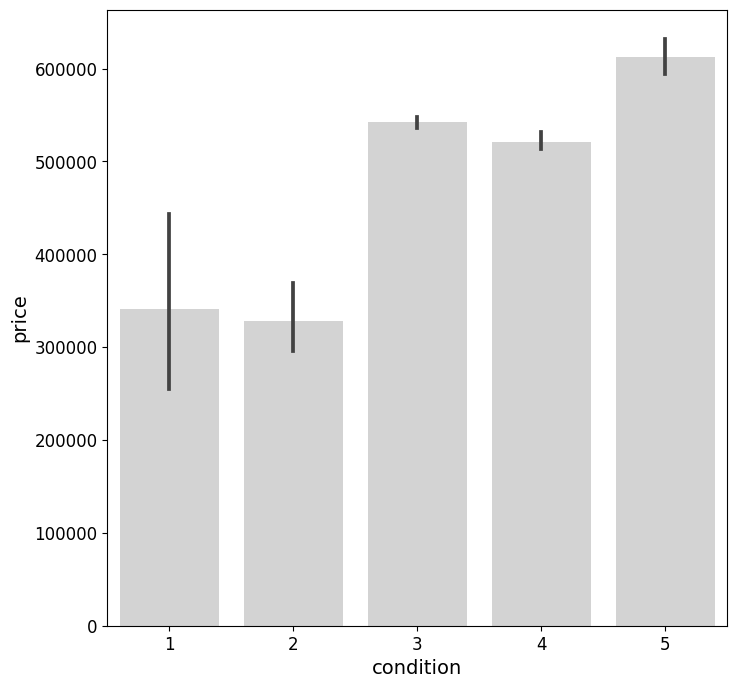

In [22]:
# check condition
sns.barplot(df,
           x = 'condition',
           y = 'price',
           color = 'lightgrey')

<Axes: xlabel='waterfront', ylabel='price'>

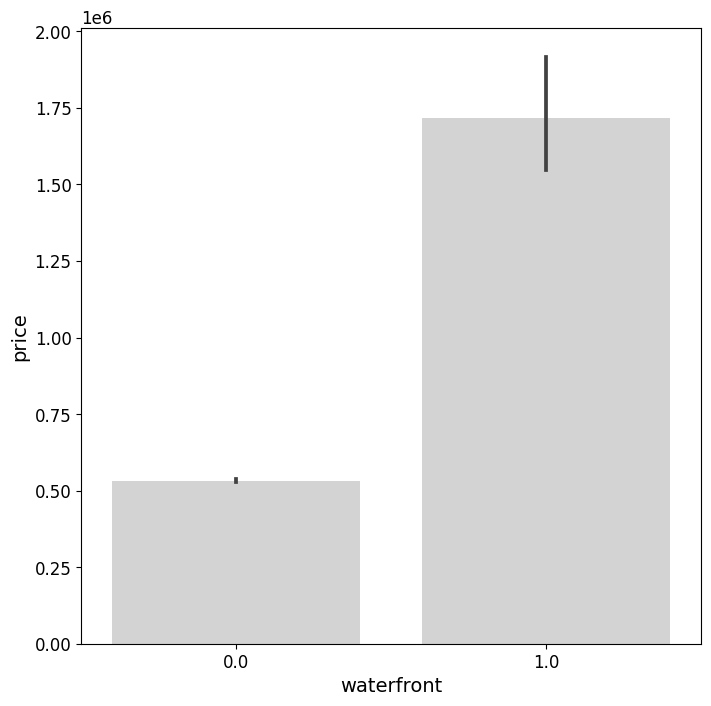

In [23]:
sns.barplot(df,
           x = 'waterfront',
           y = 'price',
           color = 'lightgrey')

In [24]:
# Check periodical fluctuation

In [25]:
df_middle50 = df.query('price < 645000 & price > 322000')
df_middle50.describe()

price       house_id        id  bedrooms  bathrooms  sqft_living  \
count  10780.000      10780.000 10780.000 10780.000  10780.000    10780.000   
mean  461616.966 4636895693.853 10952.273     3.318      2.063     1929.317   
std    89628.824 2855929244.831  6282.623     0.915      0.650      646.853   
min   322200.000    1200021.000     2.000     1.000      0.750      410.000   
25%   385000.000 2224544805.250  5516.500     3.000      1.750     1450.000   
50%   450000.000 3936900235.000 10928.500     3.000      2.250     1860.000   
75%   535000.000 7304300821.250 16464.250     4.000      2.500     2330.000   
max   644500.000 9895000040.000 21597.000    33.000      7.500     5461.000   

         sqft_lot    floors  waterfront      view  ...  sqft_basement  \
count   10780.000 10780.000    9599.000 10752.000  ...      10557.000   
mean    14301.501     1.495       0.002     0.137  ...        275.750   
std     36102.317     0.557       0.046     0.560  ...        399.855   
min       600.000     1.000       0.000     0.000  ...          0.000   
25%      4652.750     1.000       0.000     0.000  ...          0.000   
50%      7203.000     1.000       0.000     0.000  ...          0.000   
75%     10098.000     2.000       0.000     0.000  ...        540.000   
max   1074218.000     3.500       1.000     4.000  ...       2196.000   

       yr_built  yr_renovated   zipcode       lat      long  sqft_living15  \
count 10780.000      8852.000 10780.000 10780.000 10780.000      10780.000   
mean   1971.965       635.124 98081.404    47.590  -122.214       1886.893   
std      29.594      3501.596    50.303     0.130     0.146        508.645   
min    1900.000         0.000 98001.000    47.156  -122.519        399.000   
25%    1952.000         0.000 98034.000    47.512  -122.338       1500.000   
50%    1976.000         0.000 98074.000    47.606  -122.237       1810.000   
75%    1999.000         0.000 98118.000    47.697  -122.121       2230.000   
max    2015.000     20150.000 98199.000    47.778  -121.321       4362.000   

       sqft_lot15  yr_r_clean  yr_r_time  
count   10780.000     282.000    282.000  
mean    12487.920    1993.660     55.706  
std     26853.969      17.357     23.697  
min       748.000    1934.000      9.000  
25%      4800.000    1984.000     37.000  
50%      7264.000    1997.000     55.000  
75%      9719.000    2007.000     72.000  
max    438213.000    2015.000    114.000  

[8 rows x 23 columns]

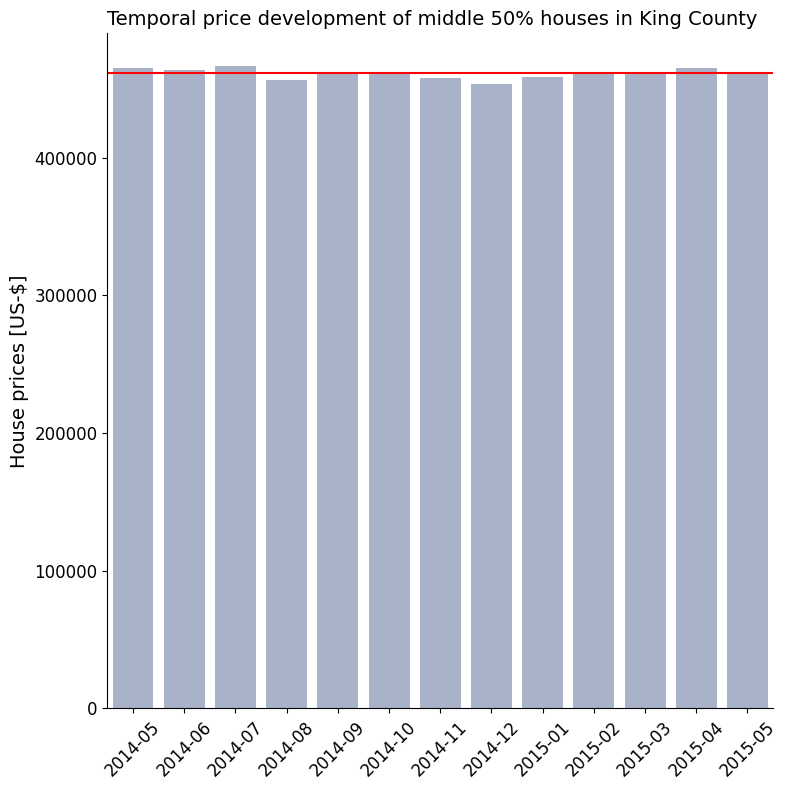

In [26]:
# check prices per month

price_per_month = sns.barplot(df_middle50,
           x = 'year_month',
           y = 'price',
           color = '#a3b0ce',
           ci = False)

sns.despine(top=True, right=True, left=False, bottom=False)
price_per_month.axhline(df_middle50.price.mean(), color = 'red')
price_per_month.set_xticklabels(price_per_month.get_xticklabels(), rotation = 45)
plt.title('Temporal price development of middle 50% houses in King County', loc = 'left')
plt.xlabel(None)
plt.ylabel('House prices [US-$]')
plt.tight_layout()  

fig = price_per_month.get_figure()
fig.savefig("./plots/presentation/03_price_temp_middle50.png")

In [27]:
# check distribution of cheaps and expensives over time:
df_priceseason = df.copy()
df_priceseason.describe().price


count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

In [28]:
df_priceseason['cost'] = ['low' if x <= 322000 else ('high' if x > 645000 else 'normal') for x in df_priceseason.price]
df_priceseason

date       price    house_id     id year_month  bedrooms  \
0      2014-05-03  379880.000  1523069197  13154    2014-05     3.000   
1      2014-05-14  766950.000  7574910780   5351    2014-05     3.000   
2      2014-05-09  201500.000  8857600490   9381    2014-05     3.000   
3      2014-05-07  280000.000  2895550280  16329    2014-05     3.000   
4      2014-05-21  189650.000  9315300260   1833    2014-05     2.000   
...           ...         ...         ...    ...        ...       ...   
21592  2015-05-04  190000.000  3326079016  17306    2015-05     2.000   
21593  2015-05-05  585000.000  8121200810    511    2015-05     4.000   
21594  2015-05-11 2200000.000  1925069082   1360    2015-05     5.000   
21595  2015-05-05  500000.000  3374300030  12046    2015-05     4.000   
21596  2015-05-07  295000.000  1843130360  14818    2015-05     3.000   

       bathrooms  sqft_living    sqft_lot  floors  ...  yr_renovated  zipcode  \
0          2.500     1650.000   14054.000   1.000  ...         0.000    98027   
1          2.500     3030.000   30007.000   1.500  ...         0.000    98077   
2          1.000     1160.000    8320.000   1.000  ...         0.000    98032   
3          2.500     1600.000    4271.000   2.000  ...         0.000    98001   
4          1.750     1100.000    7600.000   1.000  ...         0.000    98198   
...          ...          ...         ...     ...  ...           ...      ...   
21592      1.000      710.000 1164794.000   1.000  ...         0.000    98014   
21593      1.750     2430.000    7559.000   1.000  ...         0.000    98052   
21594      4.250     4640.000   22703.000   2.000  ...         0.000    98052   
21595      2.500     1770.000    8155.000   1.500  ...           NaN    98034   
21596      2.500     2030.000    4867.000   2.000  ...         0.000    98042   

         lat     long  sqft_living15  sqft_lot15  yr_r_clean  yr_bin  \
0     47.482 -122.017       1940.000   87555.000         NaN   False   
1     47.743 -122.036       3360.000   34983.000         NaN   False   
2     47.383 -122.288       1480.000    7800.000         NaN   False   
3     47.330 -122.269       1700.000    4746.000         NaN   False   
4     47.414 -122.318       1230.000    7350.000         NaN   False   
...      ...      ...            ...         ...         ...     ...   
21592 47.689 -121.909       1680.000   16730.000         NaN   False   
21593 47.721 -122.110       1980.000    8750.000         NaN   False   
21594 47.639 -122.097       3140.000   14200.000         NaN   False   
21595 47.719 -122.173       1460.000    7360.000         NaN   False   
21596 47.375 -122.128       2030.000    5000.000         NaN   False   

       yr_r_time    cost  
0            NaN  normal  
1            NaN    high  
2            NaN     low  
3            NaN     low  
4            NaN     low  
...          ...     ...  
21592        NaN     low  
21593        NaN  normal  
21594        NaN    high  
21595        NaN  normal  
21596        NaN     low  

[21597 rows x 27 columns]

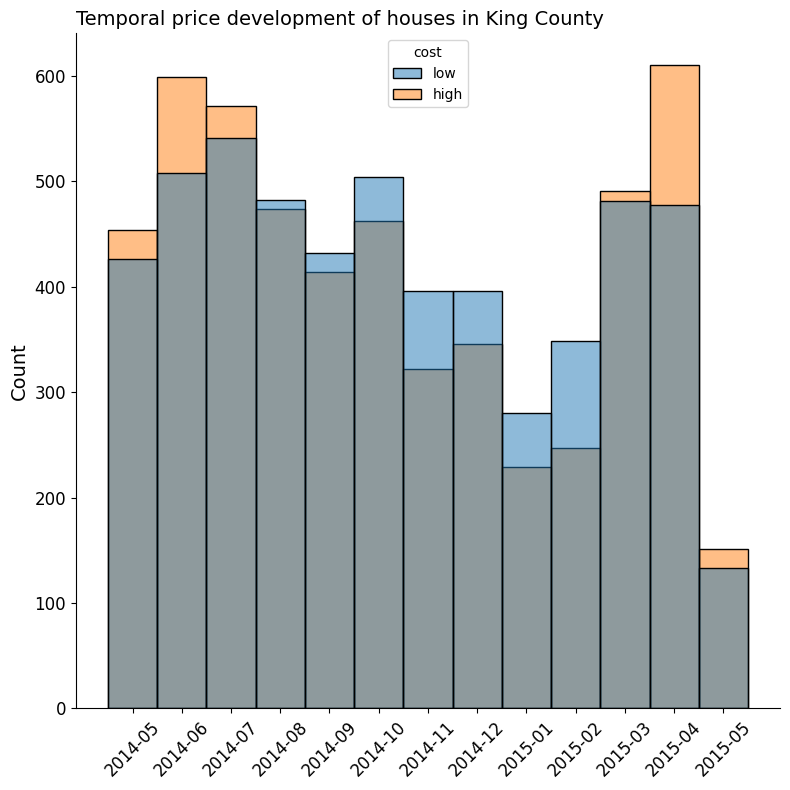

In [29]:
df_ps_cost = df_priceseason.query('cost != "normal"')
hue_order_reverse = df_ps_cost['cost'].unique()[::-1]


sales_per_month = sns.histplot(df_ps_cost, x = 'year_month', hue = 'cost', hue_order=hue_order_reverse)

sns.despine(top=True, right=True, left=False, bottom=False)
sales_per_month.set_xticklabels(sales_per_month.get_xticklabels(), rotation = 45)
plt.title('Temporal price development of houses in King County', loc = 'left')
plt.xlabel(None)
plt.tight_layout()  

fig = sales_per_month.get_figure()
fig.savefig("./plots/presentation/04_sales_per_costclass.png")

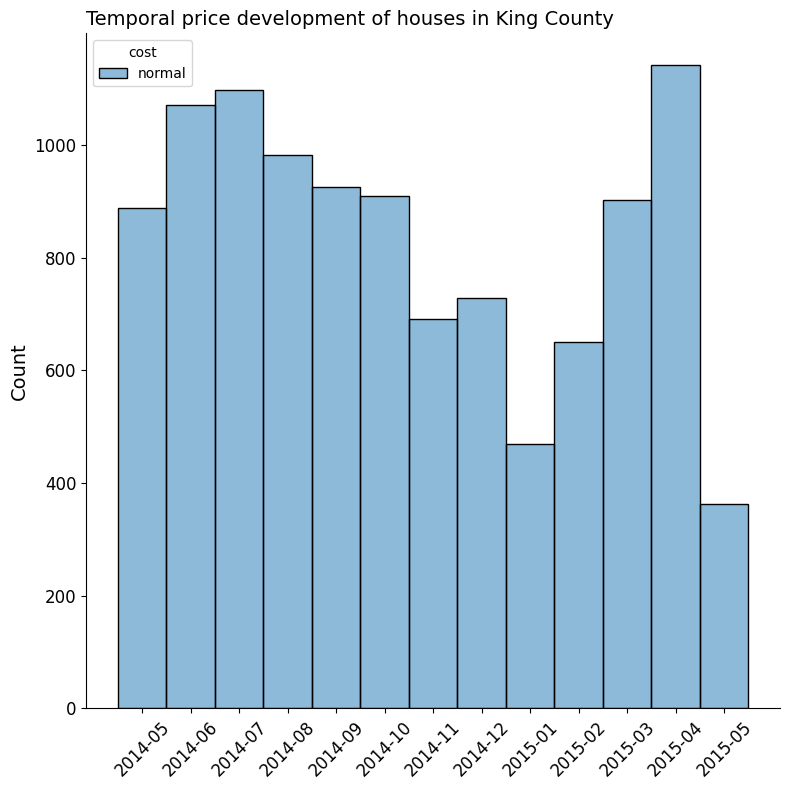

In [30]:
df_ps_cost_norm = df_priceseason.query('cost == "normal"')


sales_per_month_b = sns.histplot(df_ps_cost_norm, x = 'year_month', hue = 'cost')

sns.despine(top=True, right=True, left=False, bottom=False)
sales_per_month_b.set_xticklabels(sales_per_month_b.get_xticklabels(), rotation = 45)
plt.title('Temporal price development of houses in King County', loc = 'left')
plt.xlabel(None)
plt.tight_layout()  

fig = sales_per_month_b.get_figure()
fig.savefig("./plots/presentation/04b_sales_per_costclass.png")

In [31]:
df.columns

Index(['date', 'price', 'house_id', 'id', 'year_month', 'bedrooms',
       'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'yr_r_clean', 'yr_bin', 'yr_r_time'],
      dtype='object')

Text(0, 0.5, 'House prices [US-$]')

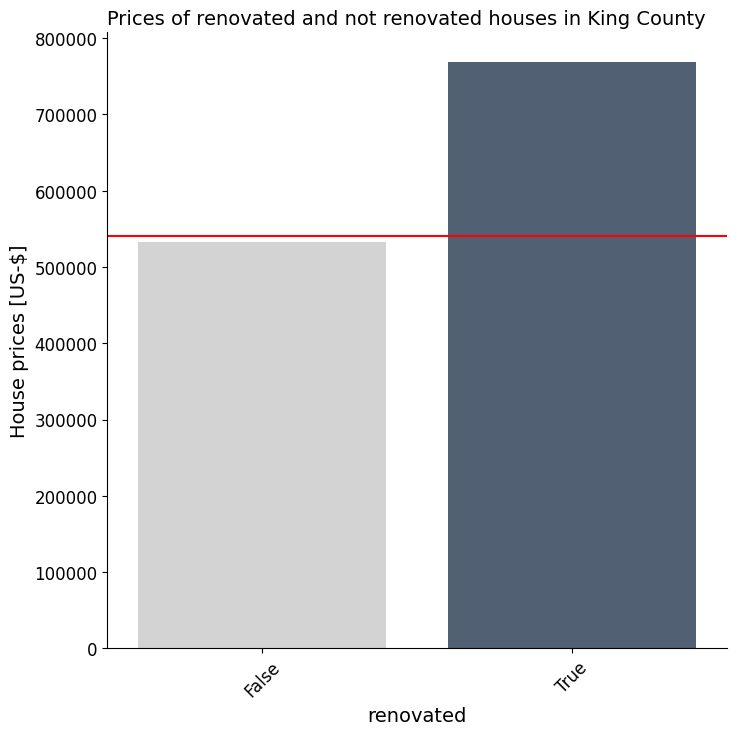

In [32]:
# Renovation:
price_ren = sns.barplot(df,
           x = 'yr_bin',
           y = 'price',
           palette = ['lightgrey', '#4B6079'],
           ci = False)

sns.despine(top=True, right=True, left=False, bottom=False)
price_ren.axhline(df.price.mean(), color = 'red')
price_ren.set_xticklabels(price_ren.get_xticklabels(), rotation = 45)
plt.title('Prices of renovated and not renovated houses in King County', loc = 'left')
plt.xlabel('renovated')
plt.ylabel('House prices [US-$]')

In [33]:
# What is the age range of houses renovated?
df.groupby('yr_bin').describe().yr_built

count     mean    std      min      25%      50%      75%      max
yr_bin                                                                       
False  20853.000 1972.125 28.975 1900.000 1953.000 1976.000 1998.000 2015.000
True     744.000 1939.456 22.089 1900.000 1921.000 1941.500 1955.000 2003.000

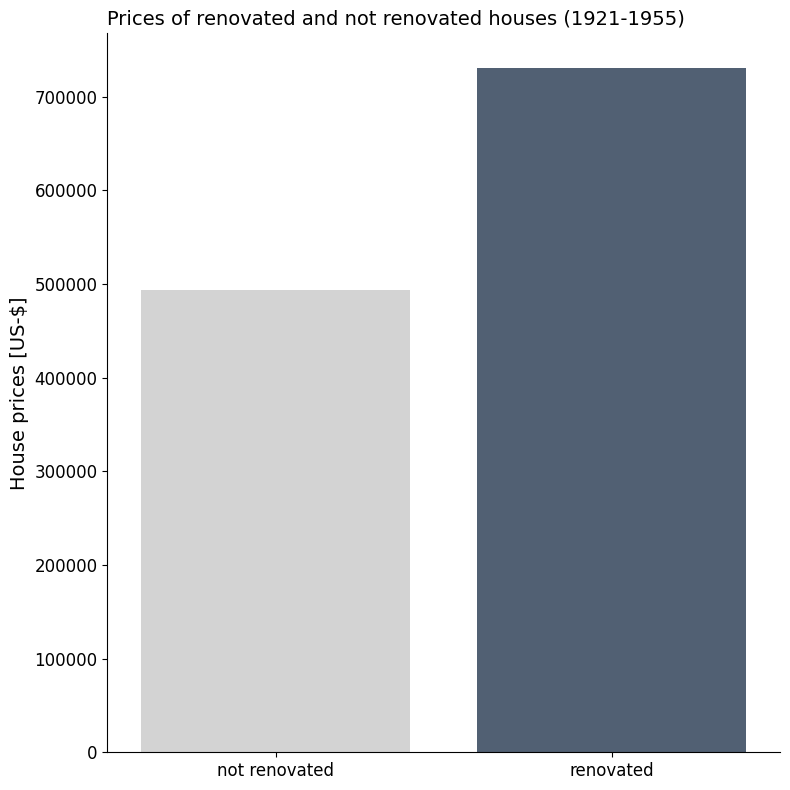

In [70]:
# maybe focus on middle range of houses.
df_ren50 = df.copy()

df_ren50 = df_ren50.query('yr_built >= 1921 & yr_built <= 1955')

price_ren50 = sns.barplot(df_ren50,
           x = 'yr_bin',
           y = 'price',
           palette = ['lightgrey', '#4B6079'], ci = False)

sns.despine(top=True, right=True, left=False, bottom=False)
plt.title('Prices of renovated and not renovated houses (1921-1955)', loc = 'left')
plt.xlabel(None)
plt.xticks(ticks = [0,1], labels = ['not renovated', 'renovated'])
plt.ylabel('House prices [US-$]')
plt.tight_layout()  

fig = price_ren50.get_figure()
fig.savefig("./plots/presentation/05_price_ren50.png")

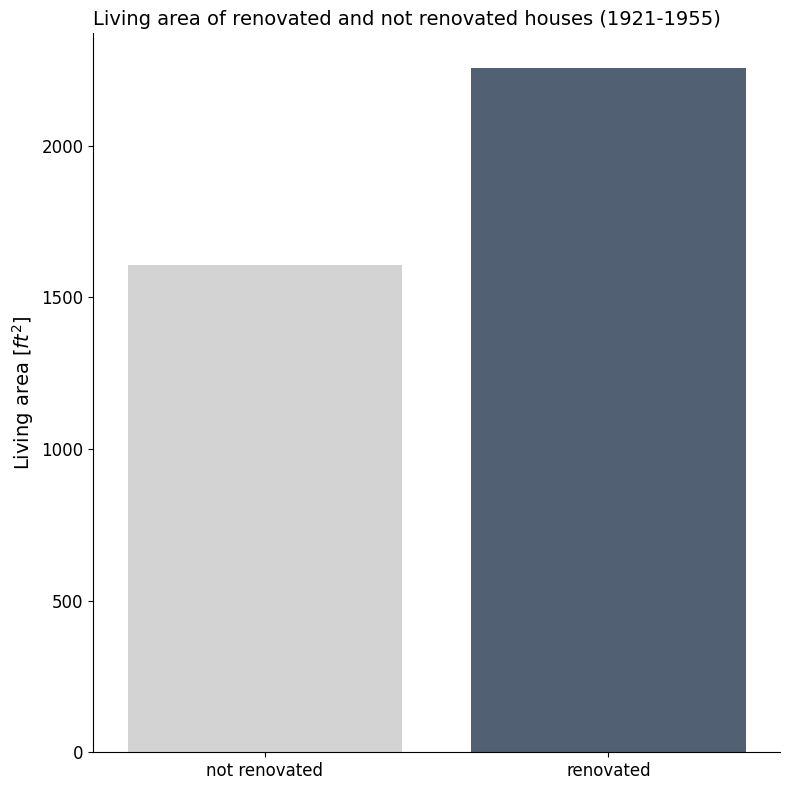

In [69]:

sqft_ren50 = sns.barplot(df_ren50,
           x = 'yr_bin',
           y = 'sqft_living',
           palette = ['lightgrey', '#4B6079'], ci = False)

sns.despine(top=True, right=True, left=False, bottom=False)
plt.title('Living area of renovated and not renovated houses (1921-1955)', loc = 'left')
plt.xlabel(None)
plt.xticks(ticks = [0,1], labels = ['not renovated', 'renovated'])
plt.ylabel('Living area [$ft^2$]')

plt.tight_layout()  

fig = sqft_ren50.get_figure()
fig.savefig("./plots/presentation/06_sqft_ren50.png")

<Axes: xlabel='price', ylabel='Count'>

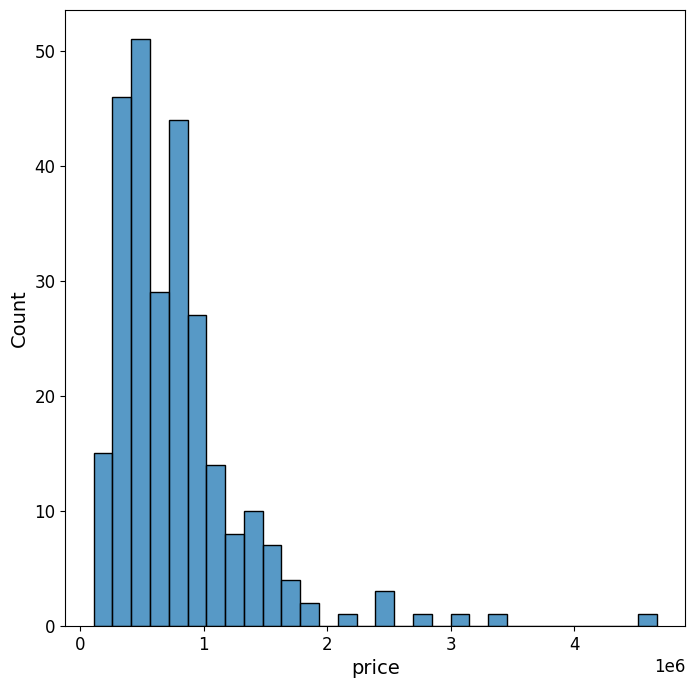

In [36]:
# check price distribution of houses renovated less than 10 years ago.
df_ren10a = df.query('yr_r_clean > 2004').copy()

sns.histplot(df_ren10a, x = 'price')

In [37]:
df_ren10a.describe().yr_built
# 1924 - 1960 IQA

count    265.000
mean    1943.189
std       23.540
min     1900.000
25%     1924.000
50%     1947.000
75%     1960.000
max     2003.000
Name: yr_built, dtype: float64

In [38]:
# create column to classify when the houses were renovated
df['ren_10'] = ['l.t.10' if x >= 2004 else ('g.t.10' if x < 2004 else 'never') for x in df.yr_r_clean]

In [39]:
df.groupby('ren_10').describe().price

count       mean        std        min        25%        50%  \
ren_10                                                                    
g.t.10   457.000 764102.302 681457.023 134000.000 400000.000 590000.000   
l.t.10   287.000 776544.446 530291.573 110000.000 422500.000 685000.000   
never  20853.000 532140.320 351894.730  78000.000 320000.000 449000.000   

              75%         max  
ren_10                         
g.t.10 876650.000 7700000.000  
l.t.10 915000.000 4670000.000  
never  635000.000 6890000.000

In [40]:
# calculate price difference between not renovated and freshly renovated.
((776544-532140) / 532140) * 100

45.928515052429816

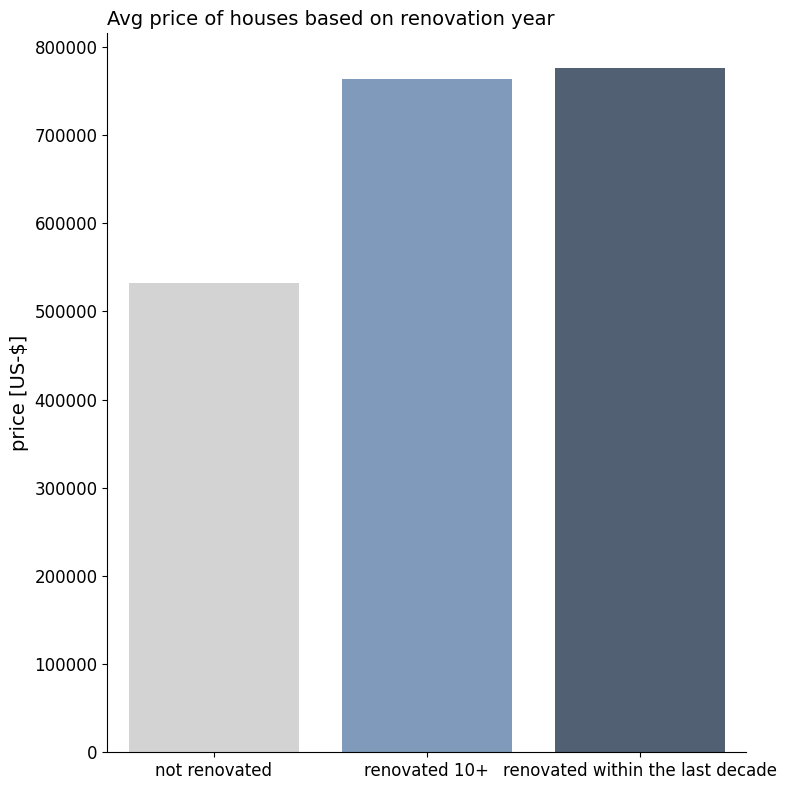

In [41]:

price_ren = sns.barplot(df, x = 'ren_10', y = 'price', ci = False, color = 'lightgrey',
                       palette = ['lightgrey','#7599c4','#4B6079'])

plt.xticks(ticks = [0,1,2], labels = ['not renovated', 'renovated 10+', 'renovated within the last decade'])

sns.despine(top=True, right=True, left=False, bottom=False)
plt.title('Avg price of houses based on renovation year', loc = 'left')
plt.xlabel(None)
plt.ylabel('price [US-$]')
plt.tight_layout()  

fig = price_ren.get_figure()
fig.savefig("./plots/presentation/07_rentime_price.png")

In [42]:
# get only houses that were resold
df_resale = df.copy()

house_id_counts = df_resale['house_id'].value_counts()

# Identify house_ids that are not unique
non_unique_house_ids = house_id_counts[house_id_counts > 1].index

# Filter the DataFrame to keep only rows where house_id is not unique
df_non_unique = df_resale[df_resale['house_id'].isin(non_unique_house_ids)]

df_non_unique.sort_values('house_id')

date      price    house_id     id year_month  bedrooms  \
9249   2014-09-16 280000.000     1000102   2495    2014-09     6.000   
20735  2015-04-22 300000.000     1000102   2496    2015-04     6.000   
10508  2014-10-16 150000.000     7200179  16801    2014-10     2.000   
20002  2015-04-24 175000.000     7200179  16802    2015-04     2.000   
7102   2014-08-20 245000.000   109200390  11422    2014-08     3.000   
...           ...        ...         ...    ...        ...       ...   
14762  2015-01-06 430000.000  9828200460   6341    2015-01     2.000   
16748  2015-02-10 615000.000  9834200305  15187    2015-02     3.000   
5005   2014-07-16 350000.000  9834200305  15186    2014-07     3.000   
19255  2015-04-20 550000.000  9834200885   1086    2015-04     4.000   
5044   2014-07-17 360000.000  9834200885   1085    2014-07     4.000   

       bathrooms  sqft_living  sqft_lot  floors  ...  yr_renovated  zipcode  \
9249       3.000     2400.000  9373.000   2.000  ...         0.000    98002   
20735      3.000     2400.000  9373.000   2.000  ...         0.000    98002   
10508      1.000      840.000 12750.000   1.000  ...           NaN    98055   
20002      1.000      840.000 12750.000   1.000  ...           NaN    98055   
7102       1.750     1480.000  3900.000   1.000  ...         0.000    98023   
...          ...          ...       ...     ...  ...           ...      ...   
14762      1.000      700.000  4800.000   1.000  ...         0.000    98122   
16748      1.000     1790.000  3876.000   1.500  ...         0.000    98144   
5005       1.000     1790.000  3876.000   1.500  ...         0.000    98144   
19255      2.500     2080.000  4080.000   1.000  ...         0.000    98144   
5044       2.500     2080.000  4080.000   1.000  ...         0.000    98144   

         lat     long  sqft_living15  sqft_lot15  yr_r_clean  yr_bin  \
9249  47.326 -122.214       2060.000    7316.000         NaN   False   
20735 47.326 -122.214       2060.000    7316.000         NaN   False   
10508 47.484 -122.211       1480.000    6969.000         NaN   False   
20002 47.484 -122.211       1480.000    6969.000         NaN   False   
7102  47.298 -122.367       1830.000    6956.000         NaN   False   
...      ...      ...            ...         ...         ...     ...   
14762 47.615 -122.300       1440.000    4800.000         NaN   False   
16748 47.575 -122.288       1360.000    4080.000         NaN   False   
5005  47.575 -122.288       1360.000    4080.000         NaN   False   
19255 47.572 -122.290       1340.000    4080.000         NaN   False   
5044  47.572 -122.290       1340.000    4080.000         NaN   False   

       yr_r_time  ren_10  
9249         NaN   never  
20735        NaN   never  
10508        NaN   never  
20002        NaN   never  
7102         NaN   never  
...          ...     ...  
14762        NaN   never  
16748        NaN   never  
5005         NaN   never  
19255        NaN   never  
5044         NaN   never  

[353 rows x 27 columns]

In [43]:
#
df_non_unique.query('yr_r_clean > 2013')

Empty DataFrame
Columns: [date, price, house_id, id, year_month, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15, yr_r_clean, yr_bin, yr_r_time, ren_10]
Index: []

[0 rows x 27 columns]

In [44]:
# check best neighborhoods:
df_hood = df.copy()

In [45]:
df_hood2 = df_hood.groupby('zipcode').describe().price

In [46]:
df_hood2.shape # -> total, 70 neighborhoods

(70, 8)

In [47]:
df_hood2['price_range'] = ((df_hood2['max'] - df_hood2['min']) / df_hood2['min']) * 100
df_hood2

count        mean        std        min        25%         50%  \
zipcode                                                                    
98001   361.000  281194.870  98837.431 100000.000 215000.000  260000.000   
98002   199.000  234284.035  52041.449  95000.000 199975.000  235000.000   
98003   280.000  294111.279 107597.662 128000.000 229000.000  267475.000   
98004   317.000 1356523.991 746094.067 425000.000 845000.000 1150000.000   
98005   168.000  810289.696 268979.168 400000.000 637775.000  765475.000   
...         ...         ...        ...        ...        ...         ...   
98177   255.000  676419.392 436379.740 245560.000 428500.000  554000.000   
98178   262.000  310612.756 161044.746  90000.000 223250.000  278277.000   
98188   136.000  289078.346 103106.580 110000.000 228750.000  264000.000   
98198   280.000  302896.739 154906.277  95000.000 216375.000  265000.000   
98199   317.000  792187.874 398428.722 323000.000 535000.000  689800.000   

                75%         max  price_range  
zipcode                                       
98001    320000.000  850000.000      750.000  
98002    268500.000  389000.000      309.474  
98003    330000.000  950000.000      642.188  
98004   1690000.000 7060000.000     1561.176  
98005    911250.000 1960000.000      390.000  
...             ...         ...          ...  
98177    739475.000 3800000.000     1447.483  
98178    349792.500 1700000.000     1788.889  
98188    335000.000  707000.000      542.727  
98198    340000.000 1350000.000     1321.053  
98199    950000.000 3200000.000      890.712  

[70 rows x 9 columns]

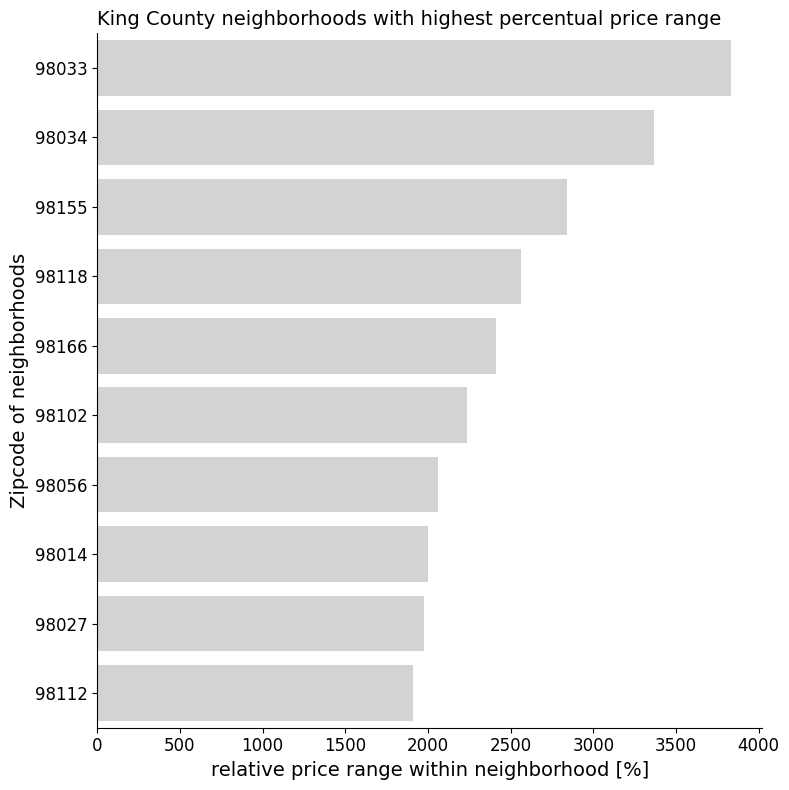

In [48]:
df_hood2['hood'] = list(df_hood2.index)
df_hood2['hood'] = df_hood2['hood'].astype(object)
df_hood2 = df_hood2.sort_values(by = 'price_range', ascending = False)


price_hood = sns.barplot(data=df_hood2.head(10),
            x='price_range',
            y='hood',
            order=df_hood2.head(10)['hood'],
            orient='h',
            color = 'lightgrey')

sns.despine(top=True, right=True, left=False, bottom=False)
plt.title('King County neighborhoods with highest percentual price range', loc = 'left')
plt.xlabel('relative price range within neighborhood [%]')
plt.ylabel('Zipcode of neighborhoods')

plt.tight_layout()  

fig = price_hood.get_figure()
fig.savefig("./plots/presentation/08_price_hood.png")

In [49]:
df.yr_r_clean.info()

<class 'pandas.core.series.Series'>
RangeIndex: 21597 entries, 0 to 21596
Series name: yr_r_clean
Non-Null Count  Dtype  
--------------  -----  
744 non-null    float64
dtypes: float64(1)
memory usage: 168.9 KB


In [51]:
# # Identify houses in neighborhood:
df_nbh = df.copy()
df_nbh = df_nbh.query('zipcode == 98033')
df_nbh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 432 entries, 29 to 21588
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           432 non-null    object 
 1   price          432 non-null    float64
 2   house_id       432 non-null    int64  
 3   id             432 non-null    int64  
 4   year_month     432 non-null    object 
 5   bedrooms       432 non-null    float64
 6   bathrooms      432 non-null    float64
 7   sqft_living    432 non-null    float64
 8   sqft_lot       432 non-null    float64
 9   floors         432 non-null    float64
 10  waterfront     376 non-null    float64
 11  view           432 non-null    float64
 12  condition      432 non-null    int64  
 13  grade          432 non-null    int64  
 14  sqft_above     432 non-null    float64
 15  sqft_basement  425 non-null    float64
 16  yr_built       432 non-null    int64  
 17  yr_renovated   359 non-null    float64
 18  zipcode     

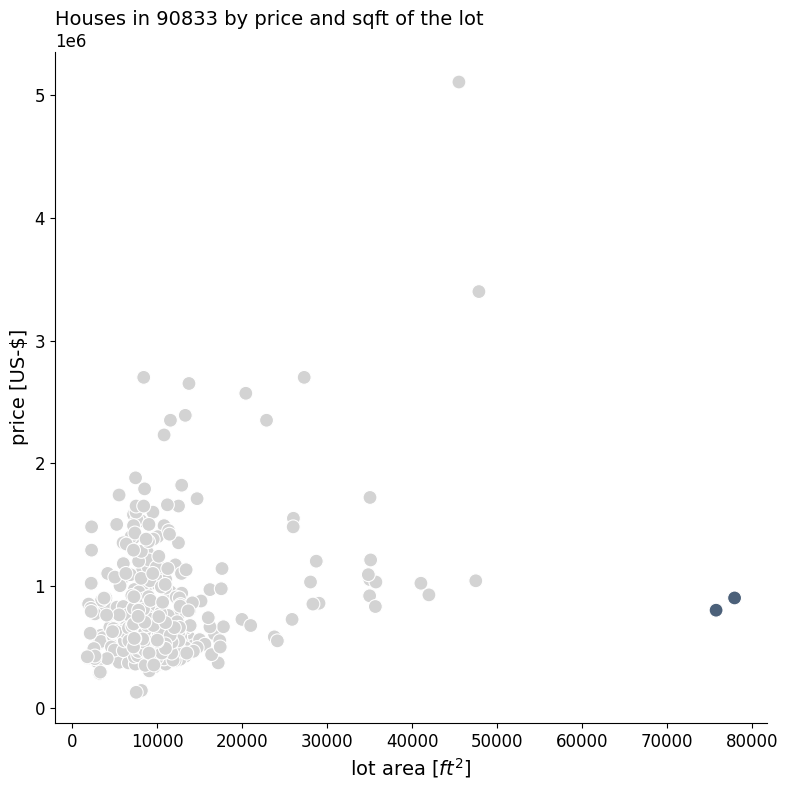

In [68]:
df_nbh['area_size'] = ['big' if x > 50000 else 'small' for x in df_nbh['sqft_lot']]
plot98033 = sns.scatterplot(df_nbh, x = 'sqft_lot', y = 'price', hue = 'area_size', palette = ['lightgrey', '#4B6079'], s = 100, legend = False)


sns.despine(top=True, right=True, left=False, bottom=False)
plt.title('Houses in 90833 by price and sqft of the lot', loc = 'left')
plt.xlabel('lot area [$ft^2$]')
plt.ylabel('price [US-$]')

plt.tight_layout()  

fig = plot98033.get_figure()
fig.savefig("./plots/presentation/09_price_sqftlot_90833.png")

In [58]:
df_2houses = df_nbh.query('sqft_lot > 50000')
df_2houses

date      price    house_id     id year_month  bedrooms  \
1204  2014-05-05 900000.000   325059171    359    2014-05     3.000   
2386  2014-06-26 800000.000  3226059083  12468    2014-06     3.000   

      bathrooms  sqft_living  sqft_lot  floors  ...  yr_renovated  zipcode  \
1204      1.000     1330.000 77972.000   1.000  ...     19540.000    98033   
2386      1.750     2080.000 75794.000   1.000  ...         0.000    98033   

        lat     long  sqft_living15  sqft_lot15  yr_r_clean  yr_bin  \
1204 47.689 -122.159       1340.000   17689.000    1954.000    True   
2386 47.702 -122.189       1870.000   11020.000         NaN   False   

      yr_r_time  ren_10  
1204     26.000  g.t.10  
2386        NaN   never  

[2 rows x 27 columns]

In [73]:
!pip install contextily

  Using cached contextily-1.6.0-py3-none-any.whl.metadata (2.9 kB)
  Using cached geopy-2.4.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached mercantile-1.2.1-py3-none-any.whl.metadata (4.8 kB)
  Using cached rasterio-1.3.10-cp311-cp311-macosx_11_0_arm64.whl.metadata (14 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached xyzservices-2024.4.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached geographiclib-2.0-py3-none-any.whl.metadata (1.4 kB)
  Using cached affine-2.4.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached cligj-0.7.2-py3-none-any.whl.metadata (5.0 kB)
  Using cached snuggs-1.4.7-py3-none-any.whl.metadata (3.4 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl.metadata (6.4 kB)
Using cached contextily-1.6.0-py3-none-any.whl (17 kB)
Using cached geopy-2.4.1-py3-none-any.whl (125 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached mercantile-1.2.1-py3-none-any.whl (14 kB)
Using cached rasterio-1.3.10-cp311-cp311-maco

             date      price    house_id     id year_month  bedrooms  \
1204   2014-05-05 900000.000   325059171    359    2014-05     3.000   
2386   2014-06-26 800000.000  3226059083  12468    2014-06     3.000   
18431  2015-03-13 425000.000   121039042   8444    2015-03     3.000   
19135  2015-04-30 328000.000  7893800335   1177    2015-04     4.000   

       bathrooms  sqft_living   sqft_lot  floors  ...  yr_renovated  zipcode  \
1204       1.000     1330.000  77972.000   1.000  ...     19540.000    98033   
2386       1.750     2080.000  75794.000   1.000  ...         0.000    98033   
18431      2.750     3610.000 107386.000   1.500  ...     19620.000    98023   
19135      3.250     3380.000   7500.000   2.000  ...           NaN    98198   

         lat     long  sqft_living15  sqft_lot15  yr_r_clean  yr_bin  \
1204  47.689 -122.159       1340.000   17689.000    1954.000    True   
2386  47.702 -122.189       1870.000   11020.000         NaN   False   
18431 47.335 -122.362 

TypeError: bounds2img() got multiple values for argument 'source'

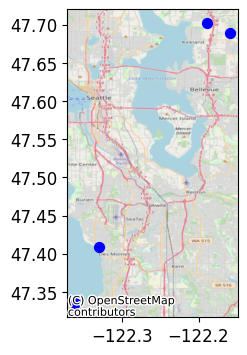

In [108]:
import contextily as cx
import matplotlib.pyplot as plt

plt.figure(figsize=(3,4))
final_houses = [325059171, 3226059083, 121039042, 7893800335]
df_final = df.copy()
df_final = df_final.query('house_id in @final_houses')
print(df_final.head())
mapplot = plt.scatter(df_final['long'], df_final['lat'], c='blue', s=50)
cx.add_basemap(ax=plt.gca(), crs='EPSG:4326', source=cx.providers.OpenStreetMap.Mapnik)
basemap, extent = cx.bounds2img(*df_final['long'], *df_final['lat'], source=cx.providers.OpenStreetMap.Mapnik)
#plt.imshow(basemap, aspect='equal')

#west, south, east, north = (-122.437, 47.1559, -121.101, 47.777)
#im, bbox = cx.bounds2img(west, south, east, north, ll=True, source=cx.providers.OpenStreetMap.Mapnik)
#plt.imshow(im)
#plt.scatter(df_final['long'], df_final['lat'], c='blue', s=50)

plt.show()

fig = mapplot.get_figure()
fig.savefig("./plots/presentation/10_map.png")